In [ ]:
!pip install qiskit --quiet
!pip install qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 79.5 MB/s eta 0:00:00


In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt


Superposition Measurement Counts: {'1': 491, '0': 533}


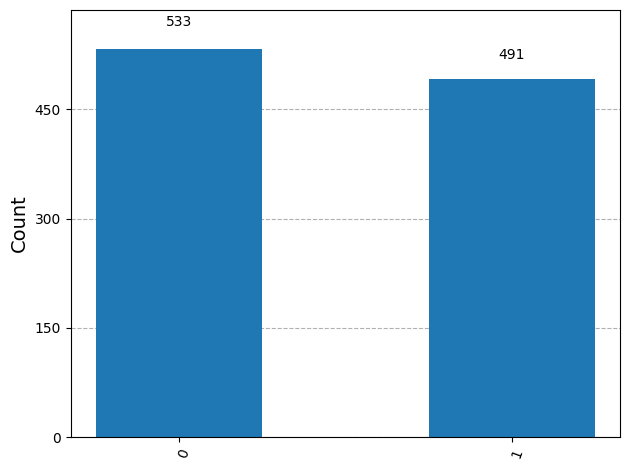

In [ ]:
# ===========================
# Superposition Example
# ===========================
# Create 1-qubit circuit
qc_super = QuantumCircuit(1)

# Apply Hadamard gate to create superposition
qc_super.h(0)

# Draw the circuit
qc_super.draw('text')

# Get statevector
state_super = Statevector.from_instruction(qc_super)
plot_bloch_multivector(state_super)
plt.show()

# Measure and simulate
qc_super.measure_all()
simulator = AerSimulator()
job_super = simulator.run(qc_super, shots=1024)
result_super = job_super.result()
counts_super = result_super.get_counts()
print("Superposition Measurement Counts:", counts_super)
plot_histogram(counts_super)



Entangled Statevector: Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
Entanglement Measurement Counts: {'11': 534, '00': 490}


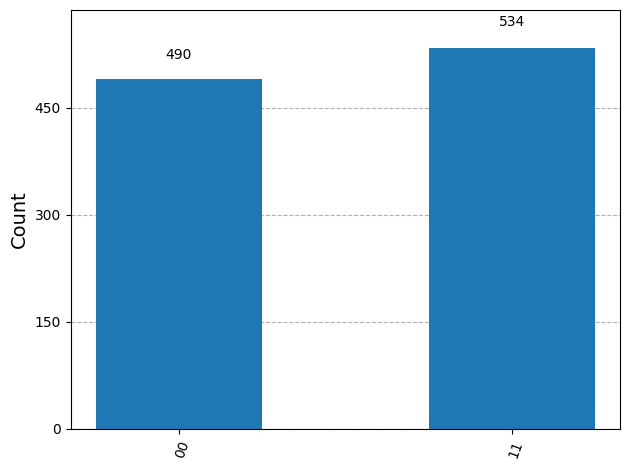

In [ ]:
# ===========================
# Entanglement Example
# ===========================
# Create 2-qubit circuit
qc_ent = QuantumCircuit(2)

# Apply Hadamard on qubit 0
qc_ent.h(0)

# Apply CNOT to entangle qubit 0 and 1
qc_ent.cx(0, 1)

# Draw the circuit
qc_ent.draw('text')

# Get statevector
state_ent = Statevector.from_instruction(qc_ent)
print("Entangled Statevector:", state_ent)
plot_bloch_multivector(state_ent)
plt.show()

# Measure and simulate
qc_ent.measure_all()
job_ent = simulator.run(qc_ent, shots=1024)
result_ent = job_ent.result()
counts_ent = result_ent.get_counts()
print("Entanglement Measurement Counts:", counts_ent)
plot_histogram(counts_ent)



In [ ]:
# Task 1: Superposition


from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

# Create a 1-qubit circuit
qc_super = QuantumCircuit(1)
qc_super.h(0)          # Apply Hadamard gate
qc_super.measure_all() # Measure the qubit


print("Quantum Circuit:")
print(qc_super.draw())

qc_super_bloch = QuantumCircuit(1)
qc_super_bloch.h(0)
state_super = Statevector.from_instruction(qc_super_bloch)
plot_bloch_multivector(state_super)
plt.show()

simulator = AerSimulator()
job_super = simulator.run(qc_super, shots=1024)
result_super = job_super.result()
counts_super = result_super.get_counts()

print("Measurement Counts:", counts_super)
plot_histogram(counts_super)

"""The Hadamard gate (H) creates an equal superposition:
	​
The Bloch sphere shows the qubit on the X-axis, representing equal probability of 0 and 1.

The histogram confirms that outcomes are roughly 50–50 split between 0 and 1."""

Quantum Circuit:
        ┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0 
Measurement Counts: {'0': 512, '1': 512}


'The Hadamard gate (H) creates an equal superposition:\n\t\u200b\nThe Bloch sphere shows the qubit on the X-axis, representing equal probability of 0 and 1.\n\nThe histogram confirms that outcomes are roughly 50–50 split between 0 and 1.'

In [ ]:
# Task 2: Entanglement

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

# Create a 2-qubit circuit
qc_ent = QuantumCircuit(2)
qc_ent.h(0)       # Apply Hadamard on qubit 0
qc_ent.cx(0, 1)
qc_ent.measure_all()

# Show the circuit
print("Quantum Circuit:")
print(qc_ent.draw())


qc_ent_state = QuantumCircuit(2)
qc_ent_state.h(0)
qc_ent_state.cx(0, 1)
state_ent = Statevector.from_instruction(qc_ent_state)


plot_state_city(state_ent)
plt.show()


simulator = AerSimulator()
job_ent = simulator.run(qc_ent, shots=1024)
result_ent = job_ent.result()
counts_ent = result_ent.get_counts()


print("Measurement Counts:", counts_ent)
plot_histogram(counts_ent)

"""Applying H on qubit 0 puts it in superposition.

  Applying CNOT (0→1) entangles qubit 1 with qubit 0.

	​The state_city plot visualizes the real and imaginary parts of amplitudes.

  The histogram confirms only 00 and 11 outcomes occur — perfect quantum correlation."""

Quantum Circuit:
        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 
Measurement Counts: {'00': 509, '11': 515}


'Applying H on qubit 0 puts it in superposition.\n\n  Applying CNOT (0→1) entangles qubit 1 with qubit 0.\n\n\t\u200bThe state_city plot visualizes the real and imaginary parts of amplitudes.\n\n  The histogram confirms only 00 and 11 outcomes occur — perfect quantum correlation.'